In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [33]:
def show(img):
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

AttributeError: ignored

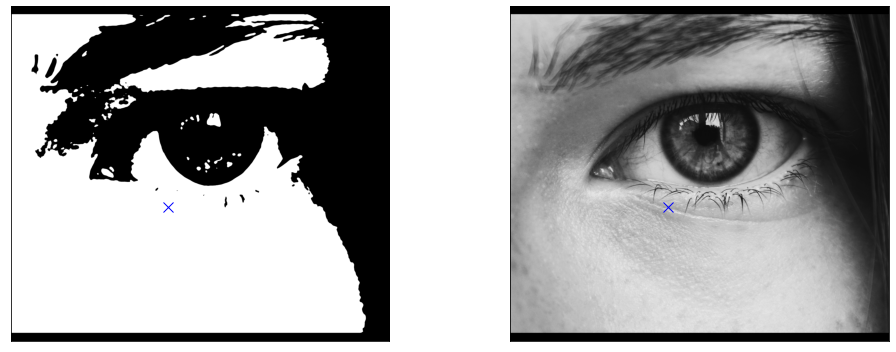

In [ ]:
M = cv2.moments(th)
h, w = img.shape
x_c = M['m10'] // M['m00']
y_c = M['m01'] // M['m00']
plt.figure(figsize=(15,5))
plt.subplot(121)
show(th)
plt.plot(x_c, y_c, 'bx', markersize=10)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]]).astype(np.uint8)
erosion = cv2.erode(th,kernel,iterations=1)
boundary = th - erosion

cnt, _ = cv2.findContours(boundary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_c = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cnt = cnt[0]
img_cnt = cv2.drawContours(img_c, [cnt], 0, (255,0,0), 2)
plt.subplot(122)
plt.plot(x_c, y_c, 'bx', markersize=10)
show(img_cnt)
plt.tight_layout()
plt.show()

cnt = cnt.reshape(-1,2)
left_id = np.argmin(cnt.sum(-1))
cnt = np.concatenate([cnt[left_id:,:], cnt[:left_id,:]])

In [ ]:
dist_c = np.sqrt(np.square(cnt-[x_c, y_c]).sum(-1))
f = np.fft.rfft(dist_c)
cutoff = 15
f_new = np.concatenate([f[:cutoff],0*f[cutoff:]])

#plt.figure(figsize=(15,5))
#plt.grid()
#plt.plot(dist_c, label='Original ED function', color='r', linewidth='3', linestyle='--')
#plt.plot(dist_c_1, label='Low frequency reconstruction', color='b', linestyle='-')
#plt.legend()
#plt.show()

In [ ]:
eta = np.square(np.abs(f_new)).sum()/np.square(np.abs(f)).sum()
print('Power Retained: {:.4f}{}'.format(eta*100,'%'))

Power Retained: 100.0000%


In [ ]:
derivative = np.diff(dist_c_1)
sign_change = np.diff(np.sign(derivative))/2
#plt.figure(figsize=(15,5))
#plt.plot(sign_change)
#plt.plot(derivative)
#plt.axhline(y=0, color='r')
#plt.grid()
#plt.show()

NameError: ignored